<a href="https://colab.research.google.com/github/AgustinVieyra/cloud-classifier/blob/main/Cloud%20recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
#Uploading the notebook to GitHub
!git clone https://github.com/AgustinVieyra/cloud-classifier.git

Cloning into 'cloud-classifier'...


In [4]:
#Importing the different libraries for the project
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [5]:
#Importing google drive package
from  google.colab import drive

In [7]:
#Importing the Deep Learning classifier
from fastai.vision import *

In [8]:
#Connect workbook to google drive folder to access images 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#save path to project folder 
root_path = 'gdrive/My Drive/Colab Notebooks/'

In [ ]:
#Save path to project folder 
proj_path =  'gdrive/My Drive/Colab Notebooks/Clouds/'

In [ ]:
#Save fastai path
p_path = Path(proj_path)

In [ ]:
/#Spliting the data 75/25 for training and testing
np.random.seed(42)
data = ImageDataBunch.from_folder(p_path, train=".", valid_pct=0.2,

SyntaxError: ignored

In [ ]:
data1.classes

In [ ]:
#show sample of images 
data1.show_batch(rows=4,figsize=(7,8))

NameError: ignored

In [ ]:
data1.classes, data.c, len(data1.train_ds), len(data1.valid_ds)


NameError: ignored

In [ ]:
#create cnn_learner object
# use resnet 34 for transfer learning 
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

In [ ]:
# train 8 epochs of the model 
learn.fit_one_cycle(9)

epoch,train_loss,valid_loss,error_rate,time
0,1.243000,1.146626,0.512195,01:07
1,0.961101,0.717201,0.170732,00:59
2,0.696003,0.281940,0.097561,00:56
3,0.562116,0.044383,0.024390,00:56
4,0.441413,0.008307,0.000000,00:57
5,0.363426,0.003030,0.000000,00:56
6,0.306834,0.001069,0.000000,00:56
7,0.263272,0.000692,0.000000,00:54
8,0.230857,0.000493,0.000000,00:54


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
#save model
learn.save('model1_34', return_path=True)

PosixPath('gdrive/My Drive/Colab Notebooks/Clouds/models/model1_34.pth')

In [ ]:
# unfreeze model. Lets you train earlier layers 
learn.unfreeze()

epoch,train_loss,valid_loss,error_rate,time


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


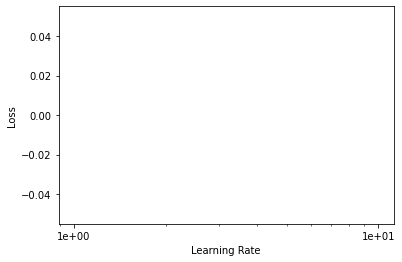

In [ ]:
#find optimal learning rates 
learn.lr_find()
learn.recorder.plot()

In [ ]:
# fit whole model with new learning rates 
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4), wd=.001)

epoch,train_loss,valid_loss,error_rate,time
0,0.006884,0.000340,0.000000,01:18
1,0.006739,0.000252,0.000000,01:16


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


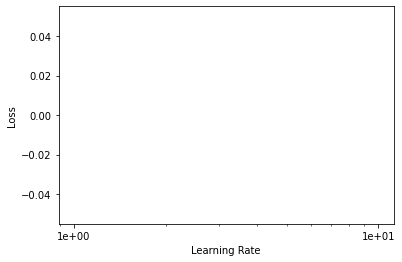

In [ ]:

learn.freeze()
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.save('model2_34')

In [ ]:
learn.load('model1_34')
interp = ClassificationInterpretation.from_learner(learn)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


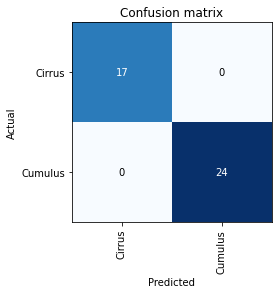

In [ ]:
#plot results of model on validation set 
interp.plot_confusion_matrix()

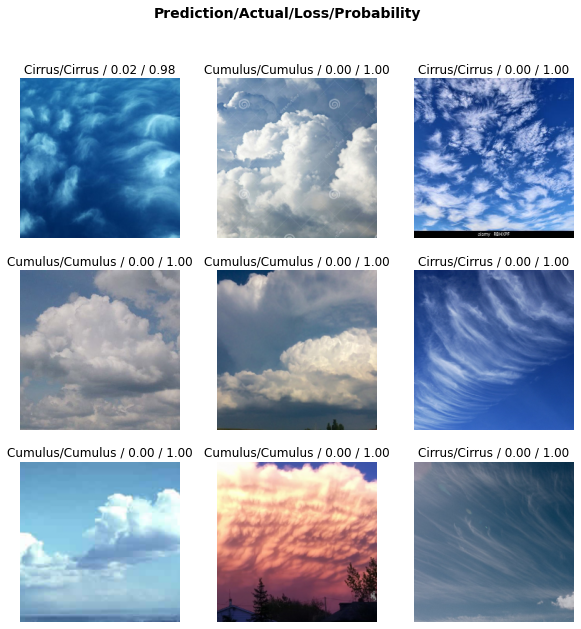

In [ ]:
# plot top losses (most wrong)
interp.plot_top_losses(9, figsize=(10,10))